In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from vbi.models.cpp.jansen_rit import JR_sde_cpp
from helpers import *

In [2]:
seed = 2
np.random.seed(seed)

In [3]:
LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [4]:
nn = 6
SC = nx.to_numpy_array(nx.complete_graph(nn))

In [5]:
par_dict = {
    "G": 1.0,
    "noise_mu": 0.24,
    "noise_std": 0.1,
    "dt": 0.05,
    "C0": 135.0 * 1.0,
    "C1": 135.0 * 0.8,
    "C2": 135.0 * 0.25,
    "C3": 135.0 * 0.25,
    "adj": SC,
    "t_transition": 500.0,      # ms
    "t_end": 2501.0,            # ms
    "data_path": "output",
}

In [6]:
control_dict = {
    "C1": {"indices": [[0], [2, 3]], "value": [135.0, 155.0]},
    "G": {"value": 1.0},
}

In [7]:
obj = JR_sde_cpp(par_dict)
print(obj())
data = obj.run(control_dict)

{'G': 1.0, 'A': 3.25, 'B': 22.0, 'a': 0.1, 'b': 0.05, 'noise_mu': 0.24, 'noise_std': 0.1, 'vmax': 0.005, 'v0': 6, 'r': 0.56, 'initial_state': None, 'adj': array([[0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0.]]), 'C0': 135.0, 'C1': 108.0, 'C2': 33.75, 'C3': 33.75, 'noise_seed': 0, 'seed': None, 'dt': 0.05, 'dim': 6, 'method': 'heun', 't_transition': 500.0, 't_end': 2501.0, 'data_path': 'output', 'RECORD_AVG': False}


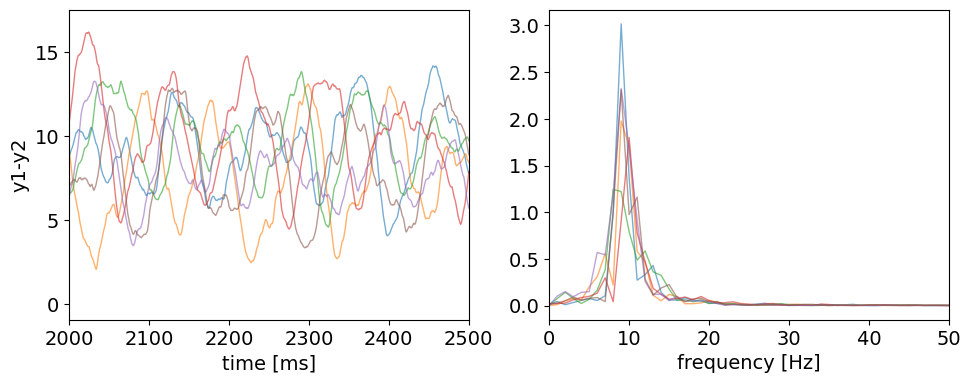

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_ts_pxx_jr(data, par_dict, [ax[0], ax[1]], alpha=0.6, lw=1)
ax[0].set_xlim(2000, 2500)
plt.tight_layout()
plt.show()